# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | chonchi
Processing Record 5 of Set 1 | fort mcmurray
Processing Record 6 of Set 1 | kem'
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | port-vila
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | rabo de peixe
Processing Record 13 of Set 1 | chinsali
Processing Record 14 of Set 1 | callao
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | remire-montjoly
Processing Record 22 of Set 1 | port lincoln
Processi

In [76]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [77]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.20,69,43,6.14,PN,1722912307
1,waitangi,-43.9535,-176.5597,11.57,79,9,2.24,NZ,1722912308
2,udachny,66.4167,112.4000,10.77,67,55,11.70,RU,1722912309
3,chonchi,-42.6128,-73.8092,6.18,96,100,1.90,CL,1722912310
4,fort mcmurray,56.7268,-111.3810,19.77,59,0,2.06,CA,1722912311


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.20,69,43,6.14,PN,1722912307
1,waitangi,-43.9535,-176.5597,11.57,79,9,2.24,NZ,1722912308
2,udachny,66.4167,112.4000,10.77,67,55,11.70,RU,1722912309
3,chonchi,-42.6128,-73.8092,6.18,96,100,1.90,CL,1722912310
4,fort mcmurray,56.7268,-111.3810,19.77,59,0,2.06,CA,1722912311


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

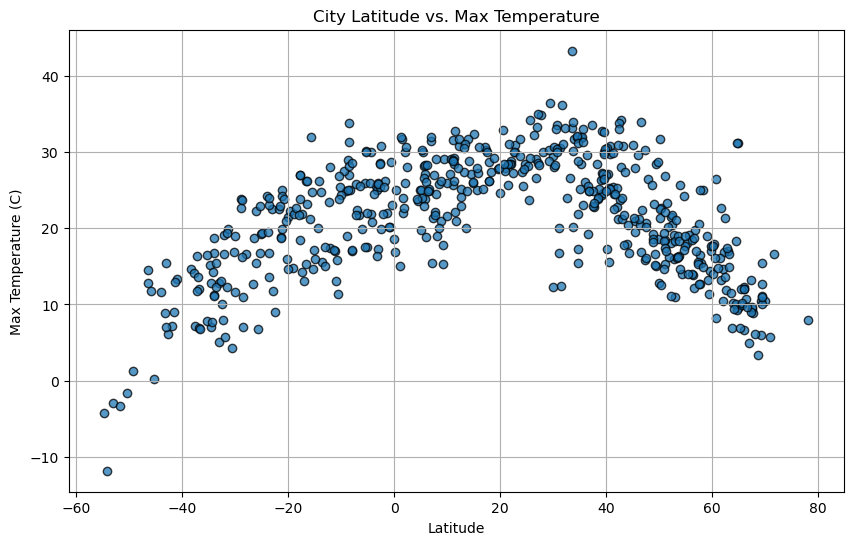

In [80]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

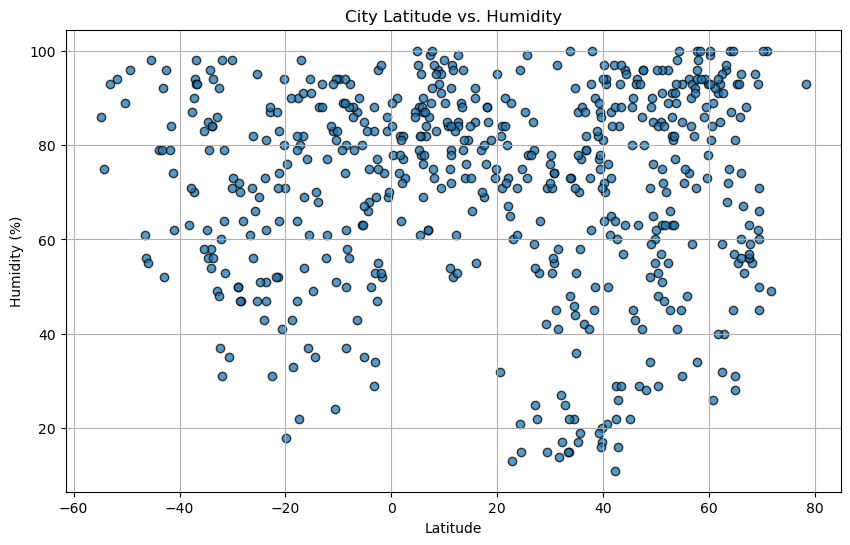

In [81]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

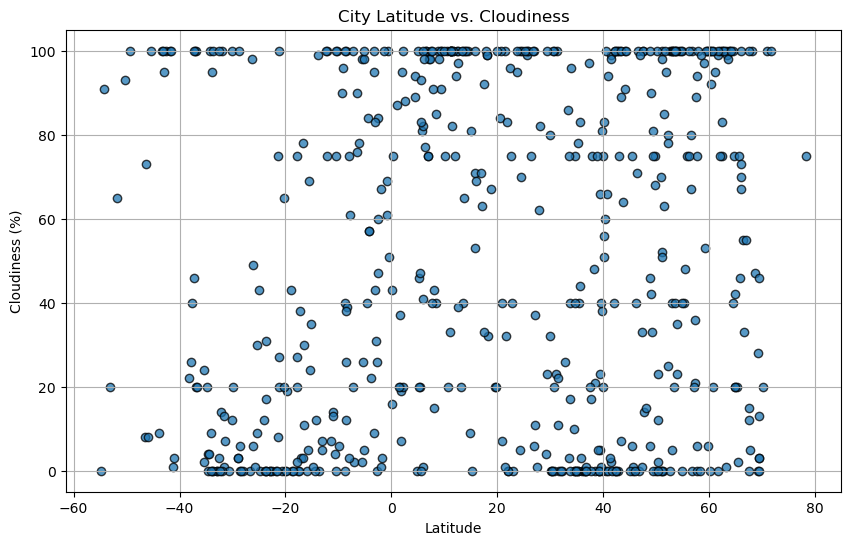

In [82]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

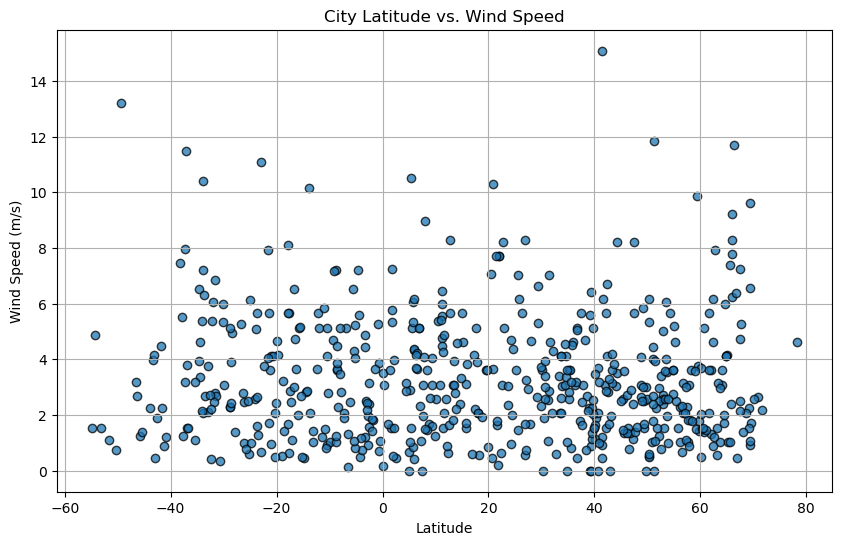

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot scatter plot and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors="k", alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()



In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,udachny,66.4167,112.4000,10.77,67,55,11.70,RU,1722912309
4,fort mcmurray,56.7268,-111.3810,19.77,59,0,2.06,CA,1722912311
5,kem',64.9555,34.5793,9.49,81,42,4.16,RU,1722912312
8,bethel,41.3712,-73.4140,25.36,87,99,1.22,US,1722912181
10,albany,42.6001,-73.9662,23.65,60,100,2.81,US,1722911761


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.20,69,43,6.14,PN,1722912307
1,waitangi,-43.9535,-176.5597,11.57,79,9,2.24,NZ,1722912308
3,chonchi,-42.6128,-73.8092,6.18,96,100,1.90,CL,1722912310
6,port-aux-francais,-49.3500,70.2167,1.23,96,100,13.22,TF,1722912313
7,port-vila,-17.7338,168.3219,23.78,64,75,5.66,VU,1722912314


###  Temperature vs. Latitude Linear Regression Plot

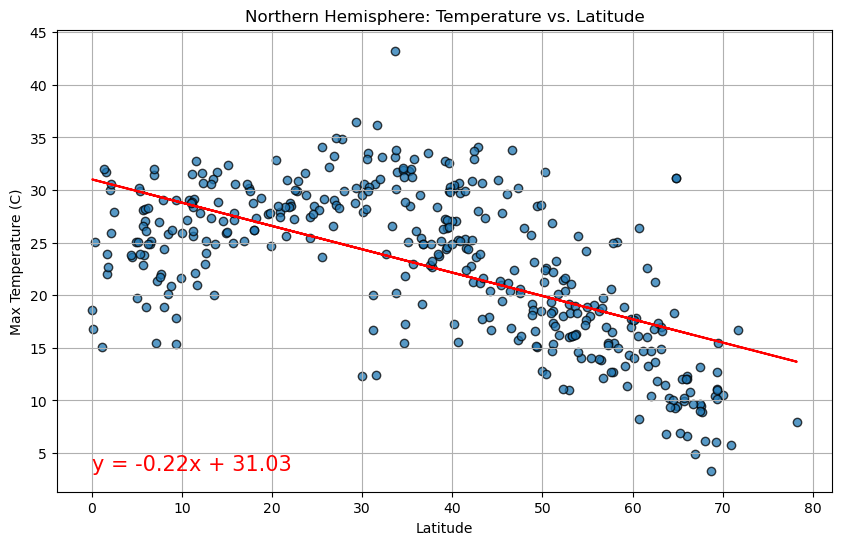

In [87]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)", "output_data/NH_Temperature_vs_Latitude.png")


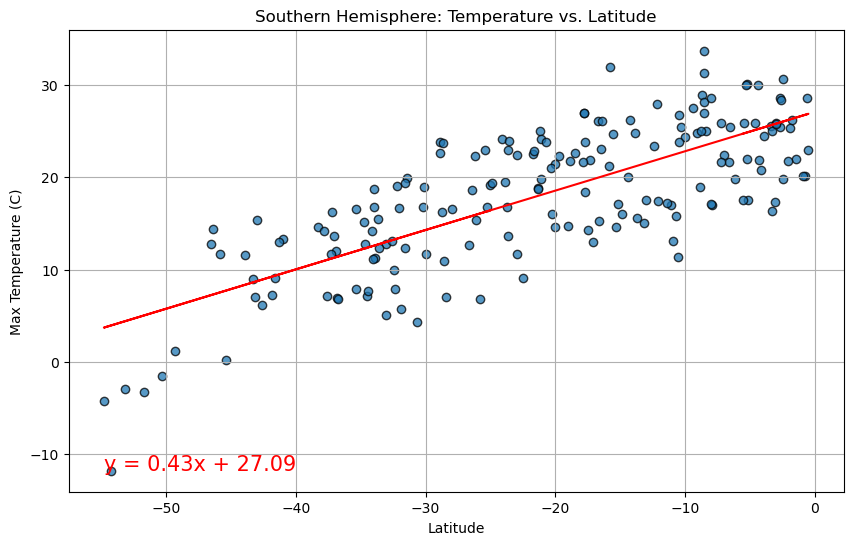

In [88]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)", "output_data/SH_Temperature_vs_Latitude.png")


**Discussion about the linear relationship:** 

Northern Hemisphere: Temperature vs. Latitude
The linear regression plot for the Northern Hemisphere shows a negative correlation between latitude and maximum temperature. As the latitude increases, the maximum temperature decreases. This is expected because locations closer to the equator tend to be warmer.

Southern Hemisphere: Temperature vs. Latitude
The linear regression plot for the Southern Hemisphere also shows a negative correlation between latitude and maximum temperature. As the latitude decreases (moving closer to the South Pole), the maximum temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

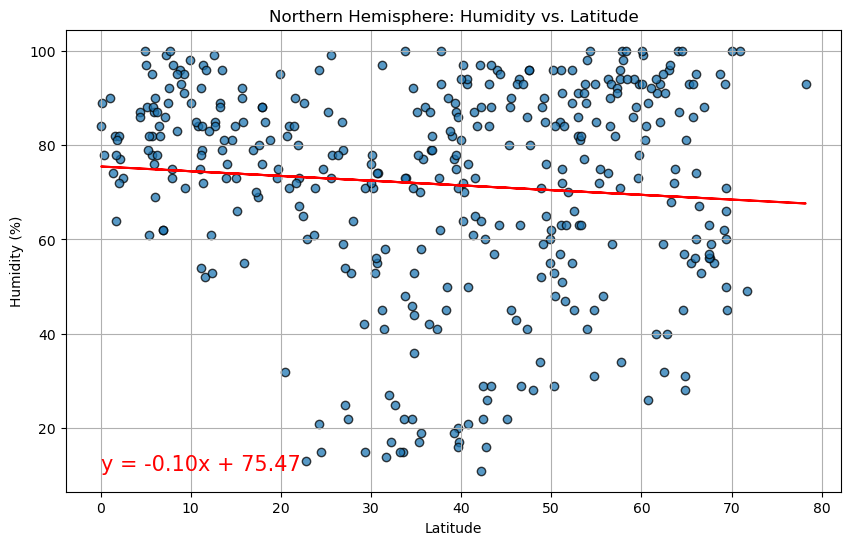

In [89]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)", "output_data/NH_Humidity_vs_Latitude.png")


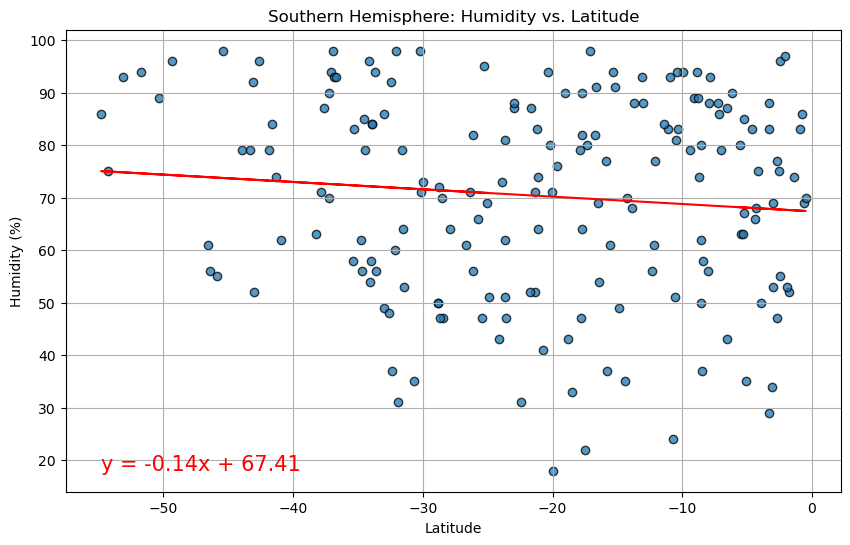

In [90]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)", "output_data/SH_Humidity_vs_Latitude.png")


**Discussion about the linear relationship:** 
Northern Hemisphere: Humidity vs. Latitude
The linear regression plot for the Northern Hemisphere shows a weak positive correlation between latitude and humidity. As the latitude increases, the humidity slightly increases. This relationship might not be very strong.

Southern Hemisphere: Humidity vs. Latitude
The linear regression plot for the Southern Hemisphere shows a weak negative correlation between latitude and humidity. As the latitude decreases, the humidity slightly decreases. Similar to the Northern Hemisphere, this relationship might not be very strong.



### Cloudiness vs. Latitude Linear Regression Plot

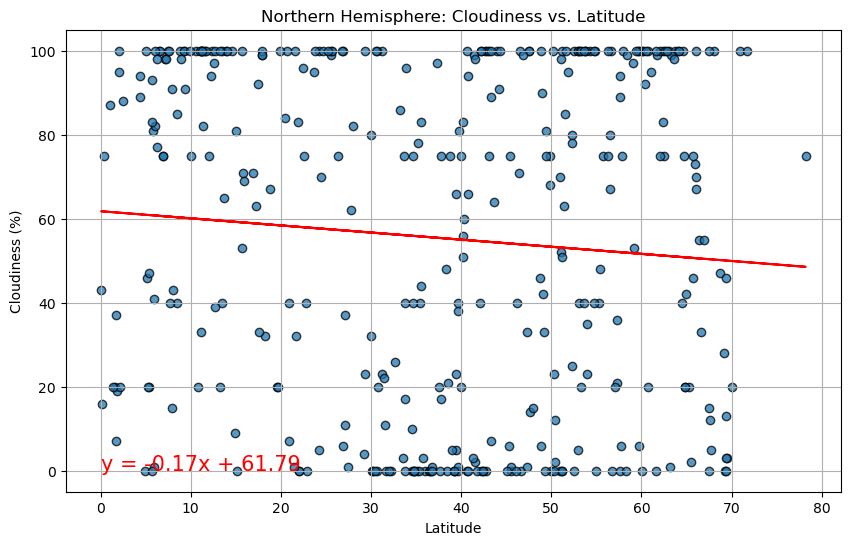

In [91]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "output_data/NH_Cloudiness_vs_Latitude.png")


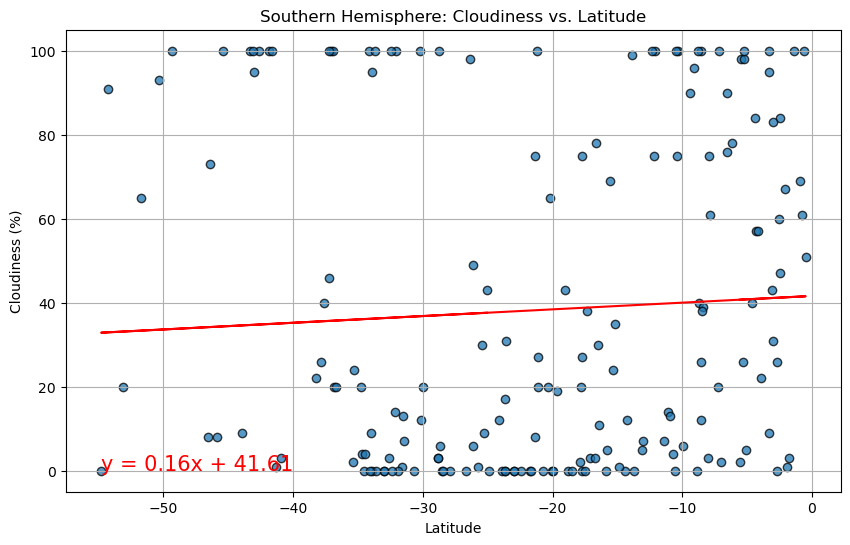

In [92]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "output_data/SH_Cloudiness_vs_Latitude.png")


**Discussion about the linear relationship:** Northern Hemisphere: Cloudiness vs. Latitude
The linear regression plot for the Northern Hemisphere shows a weak positive correlation between latitude and cloudiness. As the latitude increases, the cloudiness slightly increases.

Southern Hemisphere: Cloudiness vs. Latitude
The linear regression plot for the Southern Hemisphere shows a weak negative correlation between latitude and cloudiness. As the latitude decreases, the cloudiness slightly decreases.

### Wind Speed vs. Latitude Linear Regression Plot

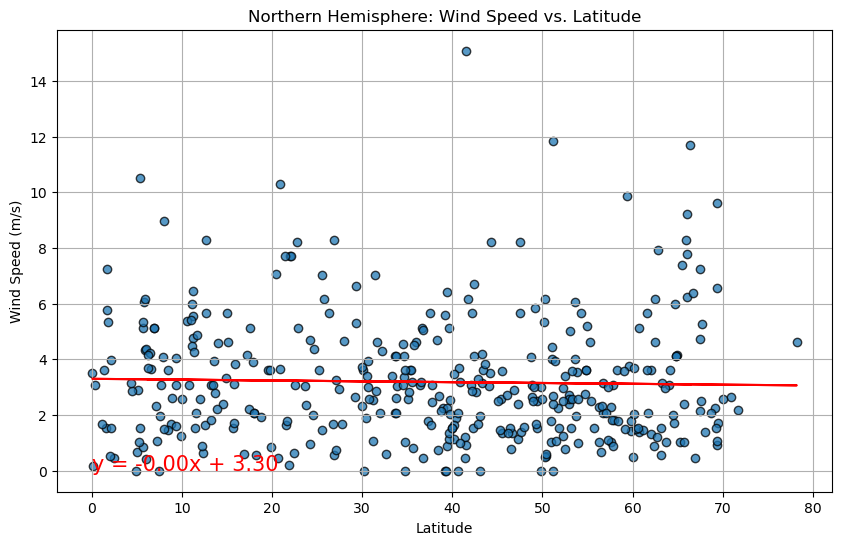

In [93]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "output_data/NH_WindSpeed_vs_Latitude.png")


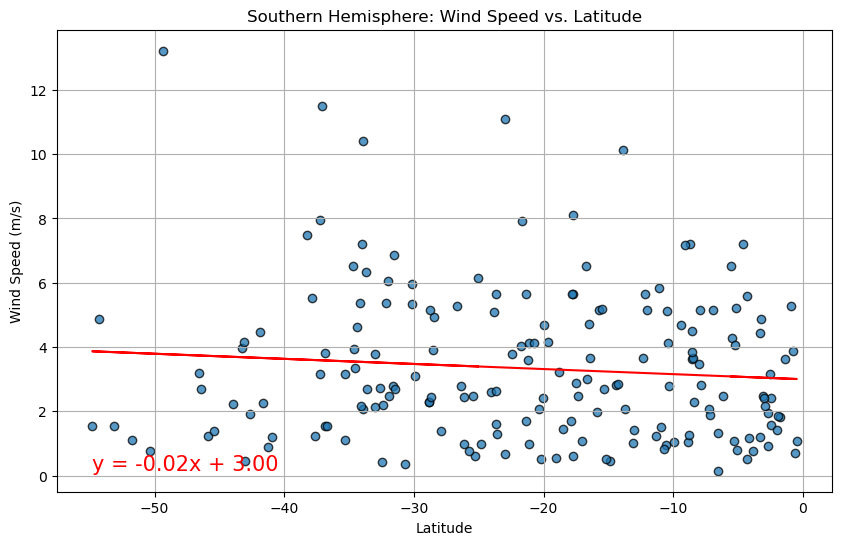

In [94]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "output_data/SH_WindSpeed_vs_Latitude.png")


**Discussion about the linear relationship:** 
Northern Hemisphere: Wind Speed vs. Latitude
The linear regression plot for the Northern Hemisphere shows a weak positive correlation between latitude and wind speed. As the latitude increases, the wind speed slightly increases.

Southern Hemisphere: Wind Speed vs. Latitude
The linear regression plot for the Southern Hemisphere shows a weak positive correlation between latitude and wind speed. As the latitude decreases, the wind speed slightly increases.

